## Statistics 504 - Fall 2015
### Class Project Proposal
### Erich Seamon
### erichs@uidaho.edu
### http://webpages.uidaho.edu/erichs
#       

### Title: " Exploring landslide likelihood across Washington using ensemble machine learning techniques"

### Introduction


The premise of this research will be to identify areas within the state of Washington that are susceptible to future landslides, based on the knowledge of past landslide events, terrain parameters, geological attributes, as well as daily meteorological data (precipitation, temperature, solar radiation, relative humidity , wind speed) (Abatzoglou, Brown, 2011).  

Previous work by Ardizzone et al (2002), Ayalew and Yamagishi (2005), Ohlmacher and DAvid (2003), all used logistical regression as a classifer method for landslide analysis. To expand upon this work, this project will evaluate four differing models to predict landslide likelihood, based on historical and future climate scenario data sets:

-logistical regression, <br> 
-support vector analysis, <br>
-random forest, and <br>
-neural networks <br>


Under the above approach, landslide explanatory variables will be fitted or “trained” on a training data set of an observed landslide locations, with thematic data such as morphometric attributes (slope, aspect) as well as information on (geology, landuse, ). In this context, the misclassification rate for landslide potential, as measured using the test data, will be the primary quantitative measure for evaluating the predictive power the model (Efron and Gong, 1983; Efron and Tib- shirani, 1986).

### Data Sources

2007 and 2008 Landslide data for the state of Washington, containing over 52,000 observations, was accessed from the Washington Department of Natural Recreation (WA DNR).  The data was provided as a downloadable .gdb file (geodatabase file).  


#### Data Transformation before Analysis

The data was imported as a csv file - that was derived from the provided geodatabase file.  This csv file contained over 52,000 observations, with latitude and longitude included as well.  The csv file was transformed into a a pandas data frame, with text based categorical fields transformed to numeric values.  From this pandas data frame, our feature columns (X) and our response variable (y).

From the 52,000+ landslide observations:

-3695 had dates. This is essential to match up with specific climate values for that day, and for the days surrounding this date.

-Of these 3695 dates, 874 had both dates, geological unit values, as well as slope and gradient. This subset of 874 points are our final observation dataset.  


### Statistical Design

For this project, a machine learning process flow will be developed that fits the aforementioned algorithms (Random Forest, SVM, Logistical Regression, Neural Networks).  Then each model will be used for prediction and learning, as we iteratively identify optimal model tuning parameters.  

After refining the model - then a series of climate variables for a set of future scenarios will be run against the model, which should provide a landslide confidence level based on future climatic outcomes.

In [247]:
import PIL
import os,sys
from PIL import Image
basewidth = 500
img = Image.open("/git/stat504-python/stat504-project/data/landslide_information_flow.jpg")
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("/git/stat504-python/stat504-project/data/landslide_information_flow_refined.jpg")

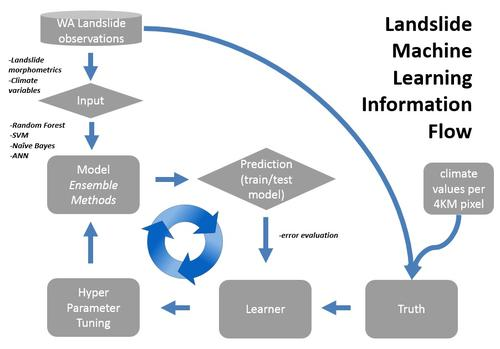

In [248]:
import os,sys
from PIL import Image
jpgfile = Image.open("/git/stat504-python/stat504-project/data/landslide_information_flow_refined.jpg")
jpgfile



### Feature Variables:

These are the variables that were collected for each of the 874 landslide observations:

1) Slope Shape (SLOPE_MORP)  CATEGORICAL - Planar, Convex, Concave, etc. <br>
2) Land Use (LAND_USE)  CATEGORICAL - Forestry, Road/Rail/Trail, Undistubed, Urban Development  <br>
3) Landslide Type (LANDSLIDE1)  CATEGORICAL - Debris Flows, Debris Slides and Avalanches, Shallow Undifferentiated, etc.<br>
4) Gradient (GRADIENT_D) CONTINUOUS - gradient of the landslide location, in degrees.<br> 
5) Geologic Unit (GEOLOGIC_U) CATEGORICAL - geologic unit. <br>
6) min temp <br>
7) max temp <br>
8) precipitation <br>
9) solar radiation <br>
10) specific humidity <br>


### Response Variable:

1) Landslide Confidence (LANDSLID_3) - Certain, Probable, Questionable, Unknown <br>



## Preliminary Data Import and Analysis

In [249]:
import matplotlib
%matplotlib nbagg

from pyproj import Proj
import StringIO
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import pydot
from IPython.display import Image

from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize
import numpy
from sklearn.cross_validation import cross_val_score

##### import csv file for all 52,000+WA landslides

In [250]:
import csv

#ifile  = open('/git/stat504-python/STAT504-PROJECT/data/WALandslides_export1.csv', "rb")
#reader = csv.reader(ifile)
#ifile.close()

In [251]:
walandslides = pd.read_csv('/git/stat504-python/stat504-project/data/WALandslides_export4.csv')

In [252]:
#walandslides = pd.read_csv('/git/stat504-python/stat504-project/data/WALandslides_export5.csv')

In [253]:
walandslides

,OBJECTID_1,OBJECTID,LANDSLIDE_,LANDSLIDE1,DSLS_MORPH,LANDSLID_1,GRADIENT_D,GRADIENT_M,SLOPE_MORP,ASPECT,...,DATA_CONFI,COMMENTS,FEATURE_SO,SOURCE_INF,SOURCE_DB_,URL,SHAPE_Leng,ORIG_FID,POINT_X,POINT_Y
0,1,1,50,Debris slide and avalanches,Unknown,NaN,38,Gradient degrees determined from Lidar,Concave-planar,0,...,Low,Probably flowed onto Hwy 101,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,350.759924,0,-123.088915,47.476685
1,2,2,51,Shallow undifferentiated,Unknown,NaN,34,Gradient degrees determined from Lidar,Planar,0,...,Low,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,199.557245,1,-123.088312,47.477029
2,3,3,52,Debris slide and avalanches,Unknown,NaN,53,Gradient degrees determined from Lidar,Planar-convex,0,...,Low,Probably moved across Hwy 106,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,634.614903,2,-123.053356,47.349413
3,4,4,53,Debris slide and avalanches,Unknown,NaN,51,Gradient degrees determined from Lidar,Concave-planar,0,...,Low,Probably moved across Hwy 106,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,806.806661,3,-122.894125,47.401870
4,5,5,54,Shallow undifferentiated,Unknown,NaN,13,Gradient degrees determined from Lidar,Planar,0,...,Low,"Damaged North Shore Rd, at least one lane","December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,232.313240,4,-122.980466,47.394887
5,6,6,55,Debris slide and avalanches,Unknown,NaN,37,Gradient degrees determined from Lidar,Planar,0,...,Low,Moved across two lanes of the North Shore Road...,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,272.318033,5,-122.996276,47.386840
6,7,7,56,Shallow undifferentiated,Unknown,NaN,32,Gradient degrees determined from Lidar,Planar,0,...,Low,"Damaged at least driveway, house?","December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,167.461072,6,-123.016458,47.376396
7,8,8,57,Shallow undifferentiated,Unknown,NaN,31,Gradient degrees determined from Lidar,Planar,0,...,Low,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,171.645621,7,-123.015265,47.377505
8,9,9,58,Debris slide and avalanches,Unknown,NaN,40,Gradient degrees determined from Lidar,Concave-planar,0,...,Low,Damaged North Shore Rd,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,222.684205,8,-123.019591,47.370388
9,10,10,59,Debris slide and avalanches,Unknown,NaN,38,Gradient degrees determined from Lidar,Concave-planar,0,...,Low,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,345.299735,9,-122.951103,47.437622


In [254]:
walandslides.describe()

,OBJECTID_1,OBJECTID,LANDSLIDE_,GRADIENT_D,ASPECT,SOURCE_DB_,SHAPE_Leng,ORIG_FID,POINT_X,POINT_Y
count,52809.00000,52809.00000,52809.00000,52809.000000,52809.000000,52809.000000,52809.000000,52809.00000,52809.000000,52809.000000
mean,26405.00000,26405.00000,26405.00000,1116.072128,1430.434377,1.123994,1501.951521,26404.00000,-122.729107,47.407136
std,15244.78952,15244.78952,15244.78952,3129.609730,3497.104408,15.233115,3586.833666,15244.78952,1.122986,0.763509
min,1.00000,1.00000,1.00000,0.000000,0.000000,0.000000,18.810442,0.00000,-124.591367,45.668859
25%,13203.00000,13203.00000,13203.00000,0.000000,0.000000,0.000000,252.888396,13202.00000,-123.540509,46.822837
50%,26405.00000,26405.00000,26405.00000,0.000000,0.000000,0.000000,600.000000,26404.00000,-122.890462,47.354174
75%,39607.00000,39607.00000,39607.00000,35.000000,0.000000,0.000000,1407.574773,39606.00000,-121.872540,47.977671
max,52809.00000,52809.00000,52809.00000,9999.000000,9999.000000,331.000000,237767.766719,52808.00000,-117.050173,48.996086


##### Plot all 52,000+ WA landslides

<IPython.core.display.Javascript object>


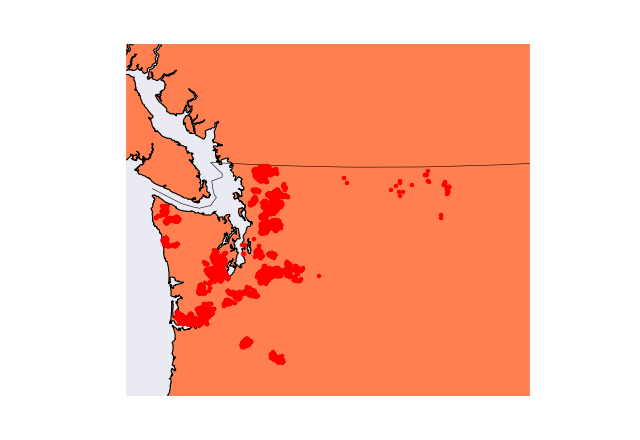

In [279]:

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib nbagg

#my_map = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')

# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
#my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
#             resolution='l', area_thresh=500)

my_map2 = Basemap(llcrnrlon=-125, llcrnrlat=45, urcrnrlon=-115,
     urcrnrlat=51, projection='tmerc', lat_1=33, lat_2=45,
     lon_0=-119, lat_0=45, resolution='h', area_thresh=10000)

my_map2.drawcoastlines()
my_map2.drawcountries()
my_map2.fillcontinents(color='coral')

lon2 = np.array(walandslides.POINT_X)
lat2 = np.array(walandslides.POINT_Y)

lon = np.array(walandslides.POINT_X)
lat = np.array(walandslides.POINT_Y)

y2,x2 = my_map2(lon2, lat2)

y,x = my_map2(lon, lat)

my_map2.plot(y2,x2, 'ro', markersize=4, markeredgecolor = 'k')
#my_map2.plot(y,x, 'ro', markersize=4, markeredgecolor = 'k')

#my_map2.plot(y,x, 'ro', markersize=4) # plots oregon data
#cbar = plt.colorbar(sc, shrink = .5)

plt.show()

### Set landslide type as numeric

In [256]:
stringh1 = set(walandslides.LANDSLIDE1)
J = list(stringh1)
J2 = list(range(1, 106))

In [257]:
i2 = iter(J)
j2 = iter(J2)
k2 = list(zip(i2, j2))

#outRes = dict((l[i], l[i+1]) if i+1 < len(l) else (l[i], '') for i in xrange(len(l)))
kdict2 = dict(k2)
kdict2.values()

walandslides['LANDSLIDE1'].replace(kdict2, inplace=True)
#print walandslides.LANDSLIDE1

### Convert categorical columns to numerical

In [258]:
walandslides['DATA_CONFI'] = walandslides.DATA_CONFI.map({'Low':0, 'Moderate-High':1})
walandslides['SLOPE_MORP'] = walandslides.SLOPE_MORP.map({'Planar':0, 'Concave-Planar':1, 'Concave, convergent':2, 'Planar-Concave':3, 'Planar-convex':4})
walandslides['LANDSLID_3'] = walandslides.LANDSLID_3.map({'Questionable':0, 'Probable':1, 'Certain':2, 'Unknown':3})

### Set feature variables and response variable

In [259]:
walandslides = walandslides[np.isfinite(walandslides['SLOPE_MORP'])]
walandslides = walandslides[np.isfinite(walandslides['LANDSLIDE1'])]
walandslides = walandslides[np.isfinite(walandslides['DATA_CONFI'])]

#walandslides.loc[walandslides['GEOLOGIC_U'] == 'Evb(gr)'] = 65
#walandslides.loc[walandslides['LANDSLID_3'] == 'Unknown'] = 65
walandslides = walandslides[walandslides.LANDSLID_3 != 3]

feature_cols = ['SLOPE_MORP', 'LANDSLIDE1', 'GRADIENT_D']
#class_cols = ['DATA_CONFI']
#feature_cols = ['LANDSLIDE1']
X = walandslides[feature_cols]
y = walandslides.LANDSLID_3

In [260]:
y = pd.concat([y], axis=1)

In [261]:
X

,SLOPE_MORP,LANDSLIDE1,GRADIENT_D
1,0,12,34
2,4,3,53
4,0,12,13
5,0,3,37
6,0,12,32
7,0,12,31
12,2,11,43
13,0,12,38
14,2,11,49
15,0,12,39


In [262]:
y

,LANDSLID_3
1,2
2,2
4,2
5,2
6,2
7,1
12,2
13,2
14,2
15,2


### Total observational count: 15556 landslides, after removing unknown values for LANDSLID_3.

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Box plot showing how slope morphology varies by landslide type, for differing landslide liklihoods. (0=questionable, 1=probable, 2=certain)

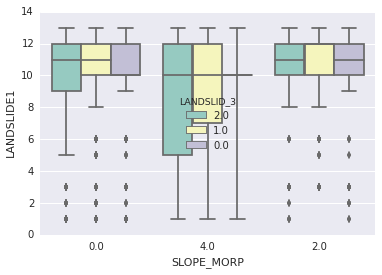

In [272]:
ax = sns.boxplot(x="SLOPE_MORP", y="LANDSLIDE1", hue="LANDSLID_3",
     data=walandslides, palette="Set3")

## Linear relationship between slope morphology and landslide type, conditioned for differing landslide liklihoods. (0=questionable, 1=probable, 2=certain),

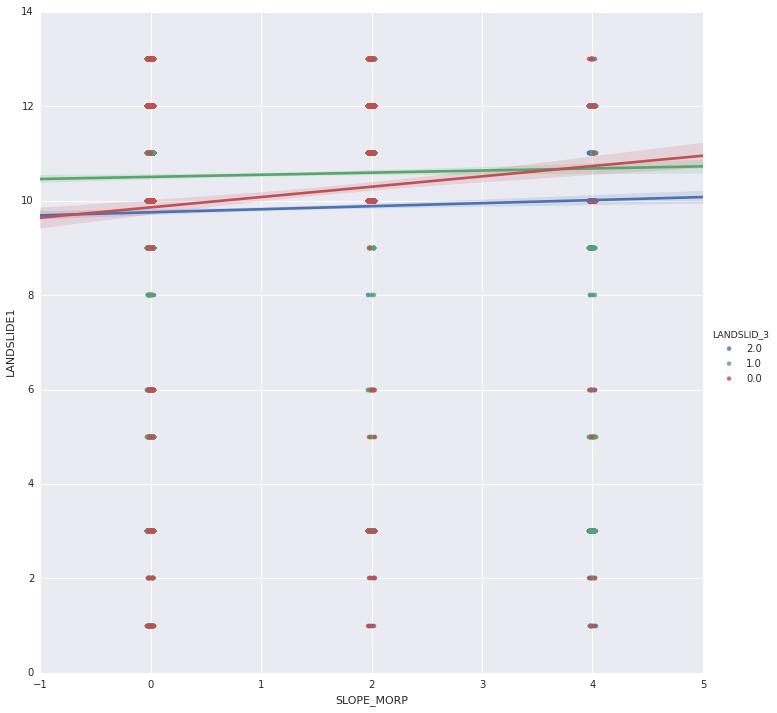

In [266]:
sns.lmplot(x="SLOPE_MORP", y="LANDSLIDE1", hue="LANDSLID_3",
     data=walandslides, ci=70, aspect=1, x_jitter=.03, size=10)

## Box plot showing how gradient varies by slope morphology, for differing landslide liklihoods. (0=questionable, 1=probable, 2=certain)

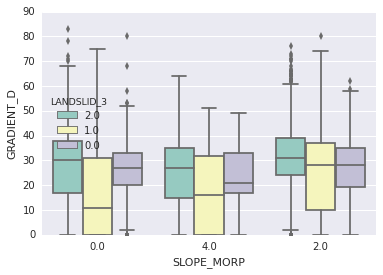

In [275]:
ax = sns.boxplot(x="SLOPE_MORP", y="GRADIENT_D", hue="LANDSLID_3",
     data=walandslides, palette="Set3")

## Linear relationship between gradient and slope morphology - conditioned on the differing landslide liklihoods. (0=questionable, 1=probable, 2=certain)

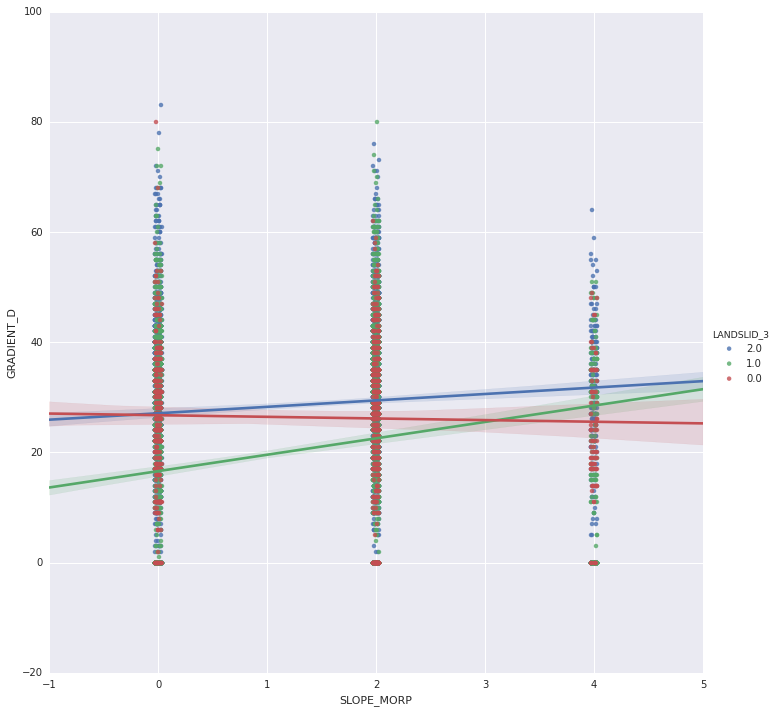

In [274]:
sns.lmplot(x="SLOPE_MORP", y="GRADIENT_D", hue="LANDSLID_3",
     data=walandslides, ci=100, aspect=1, x_jitter=.03, size=10)

## Box plot showing how landslide types varies by gradient, for differing landslide liklihoods. (0=questionable, 1=probable, 2=certain)

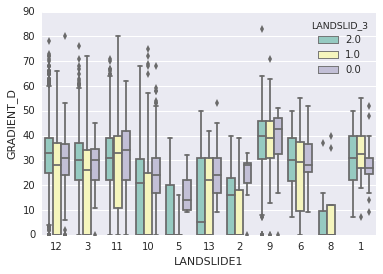

In [278]:
ax = sns.boxplot(x="LANDSLIDE1", y="GRADIENT_D", hue="LANDSLID_3",
     data=walandslides, palette="Set3")

## Linear relationship between landslide type and gradient - conditioned on differing landslide liklihoods.  (0=questionable, 1=probable, 2=certain)

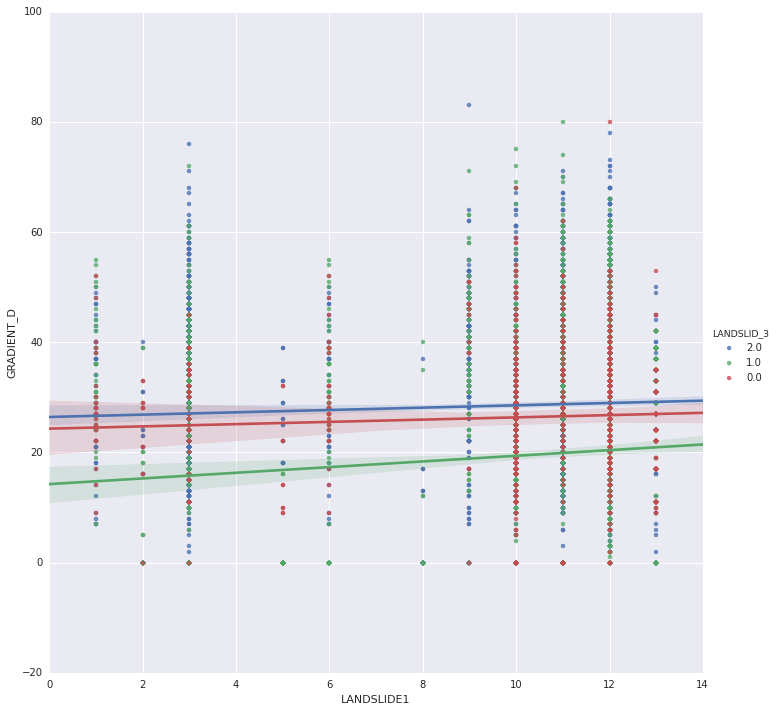

In [270]:
sns.lmplot(x="LANDSLIDE1", y="GRADIENT_D", hue="LANDSLID_3",
     data=walandslides, ci=100, aspect=1, x_jitter=0, size=10)